# Exercise 18

## Analyze class homeworks


In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import gensim

import spacy

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from spacy.lang.es.examples import sentences

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('E18.xlsx')
data.head()

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


# Exercise 18.1

Analyze the writing patterns of each student

In [3]:
data.fillna("", inplace=True)
data['Total']=data['T1']+[' ']+data['T2']+[' ']+data['T3']+[' ']+data['T4']+[' ']+data['T5']+[' ']+data['T6']

In [4]:
data.head()

,Sexo,T1,T2,T3,T4,T5,T6,Total
0,H,Un científico de datos y un ingeniero de datos...,,Los árboles de decisión es uno de los algoritm...,,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,Un científico de datos y un ingeniero de datos...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...,Aunque los dos perfiles cuentan con habilidade...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...,Python vs Stata. Analizar información es un pr...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,,Los algoritmos de machine learning buscan pred...
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...,Python vs R para análisis de datos. A pesar de...


#### Tokenización
    - Se divide cadenas de texto más largas en piezas más pequeñas o tokens

In [5]:
data['Total_T']=data['Total'].fillna("").map(nltk.word_tokenize)

In [6]:
# tokenized_word
data['Total_T']

0     [Un, científico, de, datos, y, un, ingeniero, ...
1     [Aunque, los, dos, perfiles, cuentan, con, hab...
2     [Python, vs, Stata, ., Analizar, información, ...
3     [Los, algoritmos, de, machine, learning, busca...
4     [Python, vs, R, para, análisis, de, datos, ., ...
5     [Siendo, dos, grandes, software, 's, de, analí...
6     [Data, Scientist, y, Data, Engineer, son, dos,...
7     [Las, diferencias, de, un, científico, de, dat...
8     [Uno, de, los, criterios, más, importantes, en...
9     [Diferencia, entre, un, científico, de, datos,...
10    [Existen, diferencias, significativas, en, el,...
11    [Por, un, lado, los, ingenieros, de, datos, se...
12    [Diferencias, entre, los, científicos, de, dat...
13    [La, diferencia, entre, un, data, scientist, y...
14    [Los, algoritmos, de, Machine, Learning, tiene...
15    [Machine, Learning, es, un, método, de, anális...
16    [Analytics, ha, tenido, una, tendencia, expone...
17    [El, duelo, entre, Data, Engineer, vs, Dat

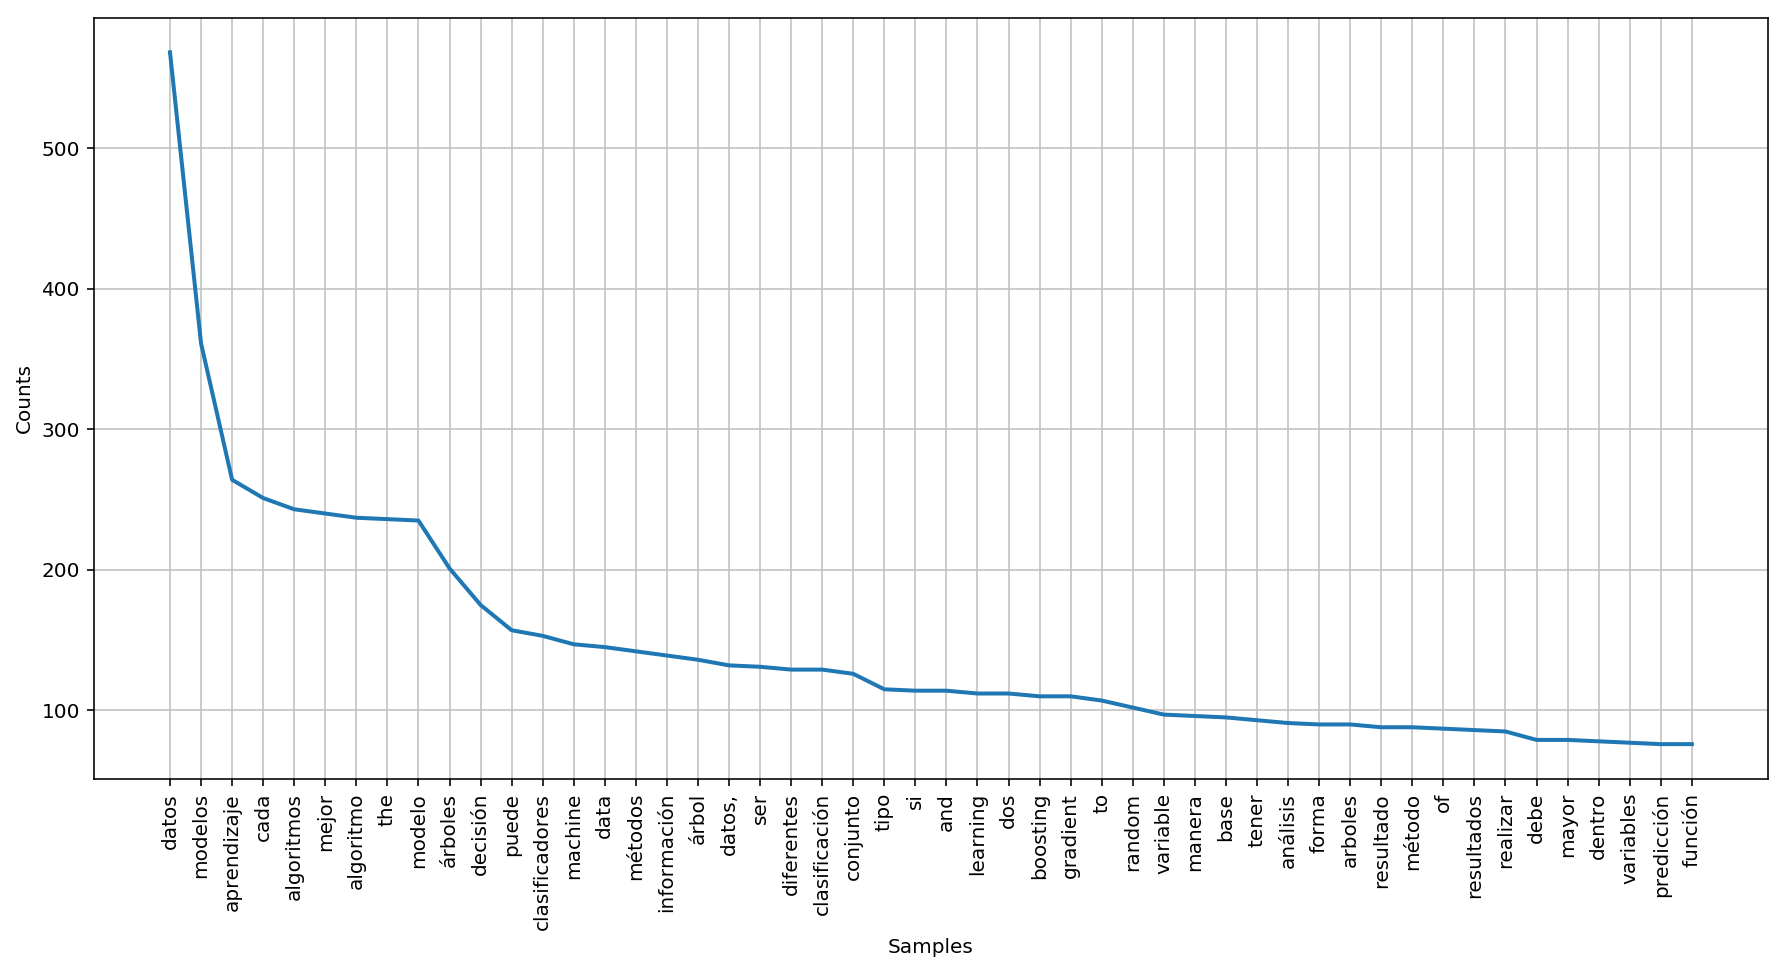

In [7]:
vals=" "
for ele in data['Total']:
    vals=ele+" "+vals
vals = vals.lower()  
als = re.sub('[^a-zA-Z]', ' ', vals )
als = re.sub(r'\s+', ' ', vals)
vals =' '.join([w for w in vals.split() if len(w)>1])

tokens = [t for t in vals.split()]

stop_words = stopwords.words('spanish')
tokens = [word for word in tokens if word not in stop_words]
freq = nltk.FreqDist(tokens)
plt.figure(figsize=(15,7))
freq.plot(50, cumulative=False)

##### Cuantas palabras hay en el texto Total

In [8]:
freq.N()

36174

##### Palabra con mayor ocurrencia

In [9]:
freq.max()

'datos'

In [10]:
freq['datos']

568

##### Palabras únicas

In [11]:
words_only = [w for w in tokens if w.isalpha()]
unique = set([w.lower() for w in words_only])
word_count = len(unique)
word_count

4951

##### Stopwords

In [12]:
stop_words=set(stopwords.words("spanish"))
print(stop_words)

{'otro', 'habríamos', 'o', 'serían', 'seas', 'esto', 'algo', 'habíais', 'me', 'el', 'tendrían', 'están', 'estaban', 'sois', 'habido', 'al', 'durante', 'otros', 'nuestro', 'es', 'nada', 'seríais', 'esta', 'fueseis', 'sentido', 'ante', 'estado', 'muchos', 'habían', 'estuviésemos', 'los', 'hay', 'sintiendo', 'os', 'hemos', 'tendrán', 'estaréis', 'eran', 'fuera', 'tuyas', 'estuvo', 'haya', 'estaríais', 'estuviéramos', 'fueses', 'tenga', 'tuviera', 'estuviera', 'estuve', 'habrás', 'hubo', 'este', 'tendrá', 'algunas', 'tienes', 'un', 'sean', 'en', 'tuviese', 'mis', 'estaríamos', 'esos', 'ellas', 'y', 'estuviste', 'habréis', 'habidos', 'nosotros', 'sobre', 'suyos', 'cual', 'estarías', 'estadas', 'habrá', 'tenemos', 'estaba', 'hubiésemos', 'tenías', 'uno', 'porque', 'teníais', 'tendríais', 'habrán', 'tuvieses', 'estaría', 'habéis', 'estuvieseis', 'sentid', 'hayan', 'tuviste', 'seríamos', 'hubiera', 'mi', 'tiene', 'la', 'nuestras', 'se', 'les', 'para', 'vosostras', 'hubieras', 'fue', 'estuviese

##### Lemmatization

In [13]:
lem = WordNetLemmatizer()

# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

##### Crear los documentos

In [14]:
raw_documents=data['Total']

In [15]:
print("Number of documents:",len(raw_documents))

Number of documents: 42


##### Usar NLTK para tokenizar
 - Un documento ahora será una lista de tokens

In [16]:
gen_docs = [[w.lower() for w in word_tokenize(text)]
            for text in raw_documents]
print(gen_docs)

[['un', 'científico', 'de', 'datos', 'y', 'un', 'ingeniero', 'de', 'datos', 'tienen', 'ciertas', 'habilidades', 'en', 'común', ',', 'por', 'ejemplo', ',', 'poseen', 'habilidades', 'de', 'programación', '.', 'sin', 'embargo', ',', 'las', 'habilidades', 'de', 'programación', 'de', 'un', 'ingeniero', 'de', 'datos', 'están', 'mucho', 'más', 'allá', 'de', 'las', 'habilidades', 'de', 'programación', 'de', 'un', 'científico', 'de', 'datos', '.', 'hacer', 'que', 'un', 'científico', 'de', 'datos', 'cree', 'un', 'flujo', 'de', 'datos', 'está', 'en', 'el', 'extremo', 'más', 'alejado', 'de', 'sus', 'habilidades', ',', 'pero', 'es', 'el', 'pan', 'de', 'cada', 'día', 'de', 'un', 'ingeniero', 'de', 'datos', '.', 'en', 'general', ',', 'existen', 'varias', 'diferencias', 'entre', 'un', 'científico', 'e', 'ingeniero', 'de', 'datos', '.', 'un', 'científico', 'de', 'datos', 'puede', 'organizar', 'y', 'almacenar', 'gran', 'cantidad', 'de', 'datos', '.', 'además', ',', 'puede', 'realizar', 'análisis', 'desc

- Se crea un diccionario a partir de una lista de documentos. Un diccionario asigna cada palabra a un número.

In [17]:
dictionary = gensim.corpora.Dictionary(gen_docs)
print(dictionary[5])
print(dictionary.token2id['datos'])
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i])

-
188
Number of words in dictionary: 6243
0 %
1 ''
2 (
3 )
4 ,
5 -
6 .
7 ..
8 .both
9 101
10 121
11 123
12 140
13 151
14 17
15 170
16 179
17 183
18 20
19 25
20 4-fold
21 5
22 7
23 81.8
24 82.30
25 :
26 ;
27 ?
28 ``
29 a
30 académica
31 accuracy
32 actually
33 acuerdo
34 addition
35 además
36 adquisición
37 afectan
38 ajusta
39 ajustados
40 ajustar
41 al
42 alcanzan
43 aleatoria
44 aleatorios
45 alejado
46 algorithms
47 algorithms2
48 algoritmos
49 algunas
50 allá
51 almacenar
52 alquiladas
53 also
54 alto
55 altos
56 amigable
57 an
58 and
59 anuales
60 análisis
61 aparte
62 aplicaciones
63 aprendizaje
64 aquellos
65 are
66 arquitecturas
67 as
68 atributo
69 atributos
70 aumentados
71 aunque
72 automatic
73 automático
74 autores
75 average
76 aware
77 azar
78 bajo
79 base
80 bases
81 basically
82 be
83 behind
84 better
85 between
86 bicicletas
87 big
88 boosted
89 boosting
90 bosques
91 buen
92 builds
93 built
94 but
95 by
96 c
97 c/c++
98 c1
99 c2
100 c4.5
101 cabo
102 cache
103 cada
1

763 ambiente
764 ambientes
765 analizar
766 ante
767 aplicado
768 aplicar
769 aporte
770 apoyo
771 aprendida
772 arboles
773 asociar
774 automatizar
775 autor
776 autónoma
777 baggin
778 bagging
779 basado
780 basarse
781 bayes
782 binarias
783 bosting
784 breiman
785 busca
786 buscó
787 c++
788 caché
789 capaz
790 caracteriza
791 castigos
792 categorización
793 catorias
794 cercanos
795 cero.xgboost
796 cinco
797 classifiergradient
798 clientes
799 colección
800 combinaciones
801 combinación
802 combinar
803 combinarse
804 cometerá
805 comienzo
806 competencias
807 completado
808 completamente
809 componentes
810 comprensible
811 computing
812 comunes
813 comunicar
814 concentrándolos
815 conceso
816 concluye
817 confiabilidad
818 conjuntos
819 considera
820 consigue
821 construcción
822 construir
823 consumo
824 contener
825 contengan
826 controlado
827 corre
828 correo
829 coste
830 cpu
831 crear
832 cuentan
833 datasets
834 decision
835 decisiones
836 decisión.random
837 deduce
838

 asemeje
1686 aumentarlo
1687 aumento
1688 bastante
1689 busque
1690 cabe
1691 cadenas
1692 capaces
1693 caracterizado
1694 cerca
1695 certera
1696 clasificada
1697 clasifican
1698 clasificar
1699 complementos
1700 complicados
1701 comporta
1702 comportamientos
1703 comprender
1704 computacionalmente
1705 computadoras
1706 confiable
1707 considerar
1708 consiste
1709 construido
1710 construyen
1711 corregir
1712 costosos
1713 crea
1714 cuanto
1715 dar
1716 dashboard
1717 debo
1718 definir
1719 dependen
1720 devuelve
1721 diferente
1722 diversas
1723 diversifica
1724 documentación
1725 durante
1726 eficiencias
1727 ejecuta
1728 elije
1729 ellas
1730 enfocado
1731 entradas
1732 entrenado
1733 entrenan
1734 escogido
1735 eso
1736 estabilidad
1737 estable
1738 estables
1739 estructurado
1740 etc.
1741 etiqueta
1742 etiquetado
1743 etiquetas
1744 exista
1745 expansión
1746 factores
1747 favorece
1748 finalmente
1749 foliares
1750 formado
1751 fuente
1752 fuera
1753 gboosting
1754 generaliza

2685 guardan
2686 habilita
2687 hojas
2688 i7
2689 importances
2690 individos
2691 integradas
2692 integran
2693 intel
2694 juegos
2695 library
2696 lightgbm
2697 logarítmica
2698 mecanismos
2699 medidad
2700 microsoft.gradient
2701 millones
2702 minimizar
2703 motivo
2704 mse
2705 nula
2706 observando
2707 obstante
2708 ofrecen
2709 ofrezcan
2710 once
2711 originaron
2712 padre
2713 palabras
2714 pandas
2715 particiones
2716 pc
2717 pequeñas
2718 pesos
2719 plataforma
2720 ponderado
2721 posibilidad
2722 potenciación
2723 predicción.finalmente
2724 predice
2725 presenta
2726 probar
2727 procesador
2728 procesarlos
2729 programar
2730 proyectos
2731 punto
2732 ram
2733 recientemente
2734 regressión
2735 representacional
2736 representación
2737 representadas
2738 representado
2739 representar
2740 retorna
2741 robótica
2742 segundos
2743 separado
2744 similitudes
2745 simples
2746 simples.el
2747 situaciones
2748 solamente
2749 taller
2750 texto
2751 toshiba
2752 unas
2753 unen
2754 un


3685 available
3686 avanzado
3687 basic
3688 been
3689 behavior
3690 belongs
3691 breast
3692 build
3693 business
3694 cambios
3695 cancer
3696 certain
3697 chance
3698 children
3699 class
3700 classifier.in
3701 collection
3702 combinations
3703 comment
3704 compute
3705 conclusions
3706 consequences
3707 considered
3708 construction
3709 consumption
3710 contextos
3711 contrast
3712 contribuir
3713 convertirla
3714 correlation
3715 cost
3716 customer
3717 decisions
3718 depends
3719 determine
3720 developed
3721 developmentally-delayed
3722 diagnosis
3723 differences
3724 dinámicos
3725 direct
3726 discriminar
3727 dominen
3728 effective
3729 energy
3730 enhance
3731 erradas
3732 evidence
3733 evolucionar
3734 expects
3735 explore
3736 fallas
3737 families
3738 family
3739 fault
3740 fields
3741 fraud
3742 frequently
3743 growing
3744 health-care
3745 heavily.-
3746 helps
3747 history
3748 humana
3749 identifies
3750 implement
3751 improbable
3752 input
3753 inteligentemente
3754 in

estrecha
4685 etiqutas
4686 experimiento
4687 fortalezas
4688 fundamentación
4689 fundamentales
4690 ganado
4691 gaussianas
4692 híbrido
4693 implica
4694 ingresan
4695 insigths
4696 interconectando
4697 jerárquico
4698 lejos
4699 mantienen
4700 mapas
4701 mediana
4702 mueven
4703 nodos.3
4704 normalizan
4705 normalmente
4706 ordenadas
4707 orienten
4708 papeles
4709 paradigma
4710 parejas
4711 permanente
4712 permitía
4713 perímetros
4714 popularidad
4715 probalemente
4716 prospectivos
4717 protagonizado
4718 proveedor
4719 pérdida.por
4720 q
4721 queden
4722 recibiendo
4723 reglas.inicialmente
4724 regresión.2
4725 reunir
4726 rumbo
4727 rutinas
4728 sarsa
4729 son:1
4730 super
4731 tecnilogías
4732 tendiran
4733 traducirlas
4734 transaccionales
4735 validez
4736 árboles.2
4737 árboles.4
4738 &
4739 .este
4740 1996
4741 94,1
4742 aclaraciones
4743 actualidad
4744 acumula
4745 algorimto
4746 almacenan
4747 aplicativos
4748 asumen
4749 aun
4750 aurélien
4751 autores.3
4752 baja
4753 bo

 50
5685 8
5686 abiertos
5687 accionistas
5688 acerca
5689 acota
5690 adaptativas
5691 adaptative
5692 adiciona
5693 afectar
5694 alcances
5695 almacenarlos
5696 amplitud
5697 analitica
5698 anaíitica
5699 apalancados
5700 apasionados
5701 aplicabilidad
5702 approaches
5703 apreciamos
5704 articulos
5705 atención
5706 ba
5707 bag
5708 basicamente
5709 basicos
5710 bayesiana
5711 bd
5712 bondad
5713 bonificación
5714 bst
5715 busqueda
5716 cado
5717 caracteristicas
5718 clasica
5719 clasicos
5720 clasifiacdores
5721 clasificacación
5722 clasificadoreseste
5723 clasification
5724 colectar
5725 comparaci
5726 compartem
5727 comperender
5728 compuesto
5729 conceptualización
5730 condicionadas
5731 condorcet
5732 conexión
5733 consistente
5734 contemplados
5735 conway
5736 correcto
5737 creería
5738 cuestionar
5739 cuyas
5740 debilidades
5741 decisione
5742 den
5743 derecha
5744 derivados
5745 descompoisición
5746 descripciones
5747 descubriendo
5748 deteriorar
5749 discriminat
5750 dispara

- Se  crea un corpus. Un corpus es una lista de bolsas de palabras. Una representación de bolsa de palabras para un documento solo enumera el número de veces que cada palabra aparece en el documento.

In [18]:
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]
print(corpus)

[[(0, 2), (1, 1), (2, 10), (3, 10), (4, 131), (5, 1), (6, 76), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 23), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 7), (42, 1), (43, 1), (44, 3), (45, 1), (46, 1), (47, 1), (48, 3), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 7), (59, 2), (60, 2), (61, 1), (62, 1), (63, 2), (64, 5), (65, 4), (66, 1), (67, 2), (68, 9), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 3), (75, 1), (76, 1), (77, 1), (78, 1), (79, 3), (80, 7), (81, 1), (82, 5), (83, 1), (84, 3), (85, 1), (86, 1), (87, 1), (88, 1), (89, 5), (90, 3), (91, 1), (92, 1), (93, 2), (94, 1), (95, 2), (96, 2), (97, 1), (98, 2), (99, 2), (100, 5), (101, 2), (102, 1), (103, 10), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 2), (

- Crear un modelo tf-idf desde el corpus

In [19]:
tf_idf = gensim.models.TfidfModel(corpus)
print(tf_idf)
s = 0
for i in corpus:
    s += len(i)
print(s)

TfidfModel(num_docs=42, num_nnz=23999)
23999


- Se crea un objeto de medida de similitud en el espacio tf-idf

In [20]:
sims = gensim.similarities.Similarity('',tf_idf[corpus],
                                      num_features=len(dictionary))
print(sims)
print(type(sims))

Similarity index with 42 documents in 0 shards (stored under )
<class 'gensim.similarities.docsim.Similarity'>


-  Crear un documento de consulta y convertirlo a tf-idf

In [21]:
query_doc = [w.lower() for w in word_tokenize("Un científico de datos")]
print(query_doc)
query_doc_bow = dictionary.doc2bow(query_doc)
print(query_doc_bow)
query_doc_tf_idf = tf_idf[query_doc_bow]
print(query_doc_tf_idf)

['un', 'científico', 'de', 'datos']
[(124, 1), (188, 1), (189, 1), (683, 1)]
[(124, 0.9984213955730602), (188, 0.03242795533662637), (189, 0.03242795533662637), (683, 0.03242795533662637)]


- Se muestra una serie de similitudes de documentos para consultar

In [22]:
sims[query_doc_tf_idf]

array([5.7256024e-02, 2.4282855e-03, 2.1838290e-03, 1.9592077e-03,
       2.2629090e-03, 1.8015483e-03, 1.2982555e-04, 9.9111207e-02,
       2.0301086e-03, 2.6176024e-02, 4.9671259e-02, 1.9419425e-03,
       2.6965842e-03, 2.0785895e-03, 1.1204405e-03, 9.3325274e-05,
       1.3954887e-02, 2.5879773e-03, 1.7532274e-02, 1.9548608e-03,
       1.5192500e-02, 1.8766789e-02, 4.2263199e-02, 2.4284241e-03,
       3.6368627e-02, 2.1319701e-03, 1.2888373e-02, 1.5315622e-03,
       7.7191758e-04, 2.3893677e-03, 1.3791271e-02, 1.9936420e-03,
       1.9851420e-03, 1.4317139e-02, 2.6535325e-02, 2.7822837e-02,
       3.6923829e-02, 4.3714862e-02, 0.0000000e+00, 4.0038235e-02,
       4.2189375e-02, 7.5094424e-02], dtype=float32)

# Exercise 18.3

Create a classifier to predict the sex of each student



In [23]:
data = pd.read_excel('E18.xlsx')
data.fillna("", inplace=True)
data['Total']=data['T1']+[' ']+data['T2']+[' ']+data['T3']+[' ']+data['T4']+[' ']+data['T5']+[' ']+data['T6']

In [24]:
stemming =  SnowballStemmer("spanish")

data['Total'] = data['Total'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
data['Total'] = data['Total'].apply(lambda x: word_tokenize(x))
data['Total']= data['Total'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))

In [25]:
X = data['Total']
y = data['Sexo']
cv = CountVectorizer()
X = cv.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
clf = MultinomialNB().fit(X_train,y_train)
clf.score(X_test,y_test)

0.8888888888888888

In [27]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           H       0.89      1.00      0.94         8
           M       0.00      0.00      0.00         1

   micro avg       0.89      0.89      0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9



In [28]:
y_pred

array(['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'], dtype='<U1')